## Introduction

The goal is to predict who passenger was transported to an alternate dimension when Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud and who not.

The datasets are from [Kaggle.com](https://www.kaggle.com/competitions/spaceship-titanic/overview)

### Workflow:
* Loading and checking data
* Exploratory data analysis (EDA)
* Filling missing Values
* Feature engineering
* Preparing data for modeling
* Training models



## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## Load data

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
combine = [df_train, df_test]
combine[1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Feature descriptions:
`PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
print(f'train set: {df_train.shape}')
print(f'test set: {df_test.shape}')

train set: (8693, 14)
test set: (4277, 13)


In [5]:
df_train.info()
print('----------------')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column       

In [6]:
print(f'Missing values [count]: \n{df_train.isna().sum()}')
print('------------------------')
print(f'Missing values [percentage]: \n{df_train.isnull().sum() * 100 / len(df_train)}')

Missing values [count]: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
------------------------
Missing values [percentage]: 
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [7]:
print(f'Missing values [count]: \n{df_test.isna().sum()}')
print('------------------------')
print(f'Missing values [percentage]: \n{df_test.isnull().sum() * 100 / len(df_test)}')

Missing values [count]: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
------------------------
Missing values [percentage]: 
PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64


## Feature engineering

#### CabinDeck and CabinSide
`Cabin` takes the form `deck/num/side`. `Deck` and `side` are categorical variables. Num is numerical variable. I will use `deck` and `side` for creating new features, `CabinDeck` and `CabinSide`.

In [8]:
for df in combine:
    df['CabinDeck'] = df['Cabin'].str.split('/').str[0]
    df['CabinSide'] = df['Cabin'].str.split('/').str[-1]

#### IsAlone
`PassengerId` takes the form `gggg_pp`, where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. From this feature i can find out who is travelling alone.

In [9]:
for df in combine:
    df['PassengerGroup'] = df['PassengerId'].str.split('_').str[0]
    df['GroupId'] = df['PassengerId'].str.split('_').str[-1]

In [10]:
alone_list = []
for df in combine:
    for i in df['PassengerGroup']:
        count = 0
        for j in df['PassengerGroup']:
            if i == j:
                count +=1
        if count == 1:
            alone_list.append(i)

In [11]:
for df in combine:
    df['IsAlone'] = df['PassengerGroup'].apply(lambda x: True if x in alone_list else False)

Drop support features.

In [12]:
for df in combine:
    df.drop(columns=['PassengerId', 'Cabin', 'PassengerGroup', 'GroupId'], axis=1, inplace=True)

In [13]:
for col in list(df_train.columns):
    print(f'Unique values in {col}: {len(list(df_train[col].dropna().unique()))}')
    if len(list(df_train[col].dropna().unique())) < 100:
        print(f'{sorted(list(df_train[col].dropna().unique()))}')

Unique values in HomePlanet: 3
['Earth', 'Europa', 'Mars']
Unique values in CryoSleep: 2
[False, True]
Unique values in Destination: 3
['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
Unique values in Age: 80
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0]
Unique values in VIP: 2
[False, True]
Unique values in RoomService: 1273
Unique values in FoodCourt: 1507
Unique values in ShoppingMall: 1115
Unique values in Spa: 1327
Unique values in VRDeck: 1306
Unique values in Name: 8473
Unique values in Transported: 2
[False, True]
Unique values in CabinDeck: 8
['A', 'B', 'C', 'D

## EDA

<AxesSubplot:xlabel='Transported', ylabel='count'>

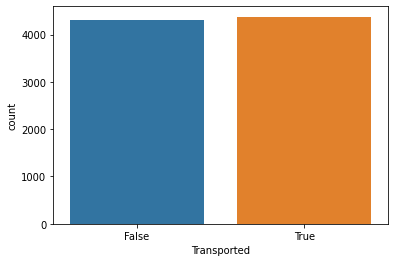

In [14]:
sns.countplot(x='Transported', data= df_train)

`Transported` is highly balanced.

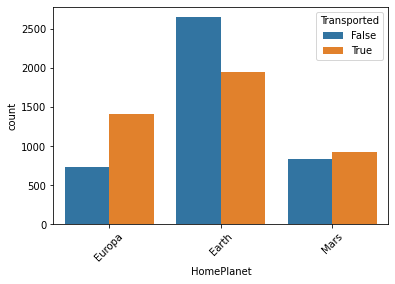

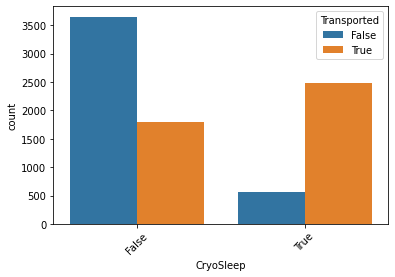

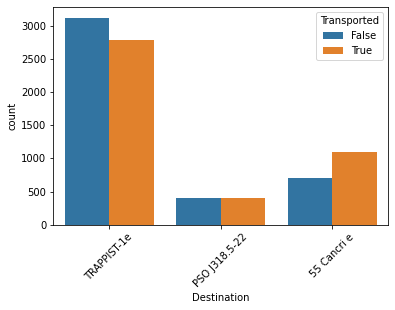

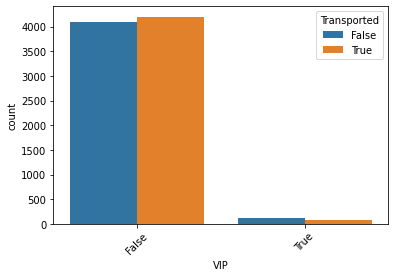

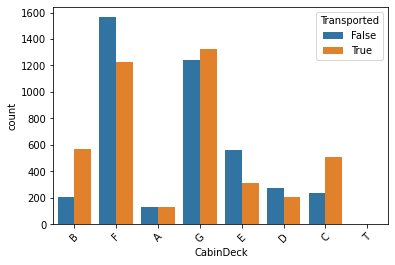

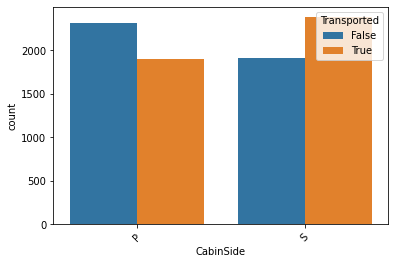

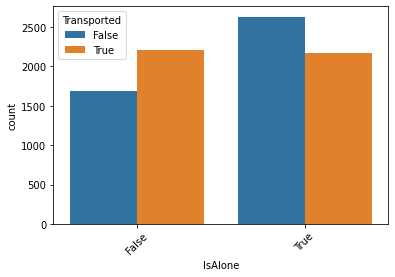

In [15]:
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide', 'IsAlone']
for col in columns:
    sns.countplot(x= col, data = df_train, hue='Transported')
    plt.xticks(rotation=45)
    plt.show()

`CryoSleep` has highly impact on `Transported`.

`VIP` has almost no impact on `Transported`.

**Other features** have atleast some impact on `Transported`.


In [16]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

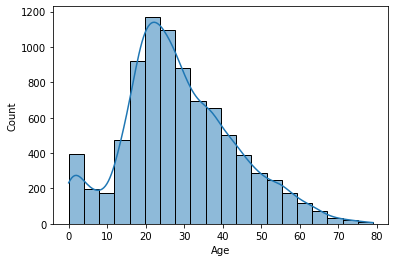

In [17]:
sns.histplot(data=df_train, x='Age', bins=20, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

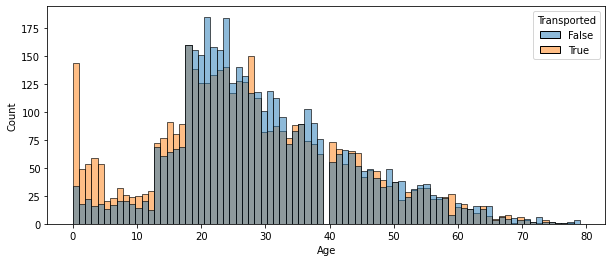

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(df_train, x='Age', hue='Transported', bins=len(df_train.Age.unique()))

**0 year olds** passengers were the most chance to be transported.

**1-18 year olds** passengers were more chance to be transported than not.

**19-40 year olds** passengers with a few exceptions were less chance to be transported than not.

**40+ year olds** passengers were approximatle same chance to be transported or not.

In [19]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    q_90 = round(df[col].quantile(.90), 2)
    print(f'90. percentil of {col} = {q_90}')

90. percentil of RoomService = 792.2
90. percentil of FoodCourt = 991.0
90. percentil of ShoppingMall = 631.2
90. percentil of Spa = 742.5
90. percentil of VRDeck = 703.8


`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` have atless 50% values = 0 and 90% values < 1000 except for `FoodCourt` which has 90. percentil = 1026.

In [20]:
df = df_train.copy()
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in columns:
    col_name = col + 'Band'
    df[col_name] = pd.cut(df[col], bins=[-1, 1, 100,  1000, df[col].max() +1], 
                             labels=['Zero','Low', 'Medium', 'High'])

Now i splitted values to 4 bands by these parameters:

* **Zero** = 0
* **Low** <= 100
* **Medium** <= 1000
* **High** > 1000

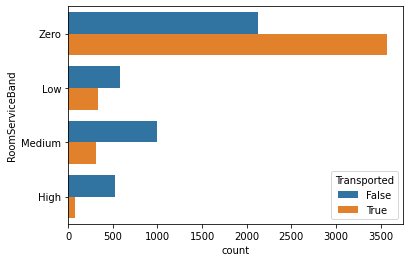

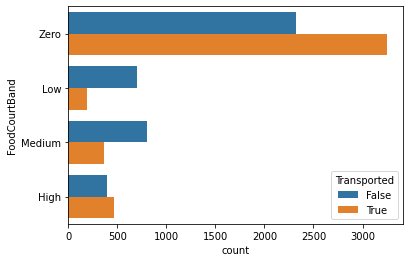

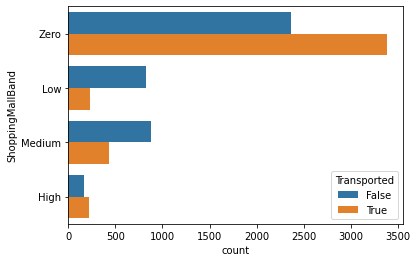

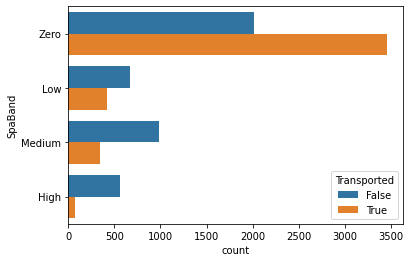

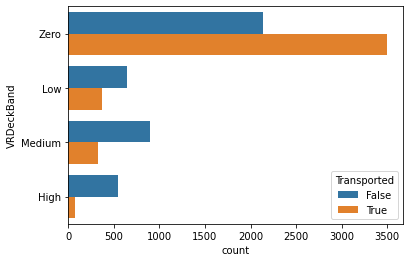

In [21]:
for col in ['RoomServiceBand', 'FoodCourtBand', 'ShoppingMallBand', 'SpaBand', 'VRDeckBand']:
    sns.countplot(data=df, y=col, hue='Transported')
    plt.show()

Passengers who no paid for luxury service were more chance to be transported then not.

Passengers who paid for luxury service were less chance to be transported then not.

This fact can be tricky, because passengers in cryo sleep didn't pay for luxury service and `CryoSleep` were highly impact on `Transported` too.

## Missing values solving

In [22]:
print(f'Missing values [percentage]: \n{df_train.isnull().sum() * 100 / len(df_train)}')
print('------------------------')
print(f'Missing values [percentage]: \n{df_test.isnull().sum() * 100 / len(df_test)}')

Missing values [percentage]: 
HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
CabinDeck       2.289198
CabinSide       2.289198
IsAlone         0.000000
dtype: float64
------------------------
Missing values [percentage]: 
HomePlanet      2.034136
CryoSleep       2.174421
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
CabinDeck       2.338087
CabinSide       2.338087
IsAlone         0.000000
dtype: float64


Because each feature have low missing values by percentage i will replace missing values by **modus** for categorical variables and by **median** for numerical variables.

In [23]:
for df in combine:
    df['VIP'].fillna(df.VIP.mode()[0], inplace=True)
    df['CryoSleep'].fillna(df.CryoSleep.mode()[0], inplace=True)
    df['HomePlanet'].fillna(df.HomePlanet.mode()[0], inplace=True)
    df['Destination'].fillna(df.Destination.mode()[0], inplace=True)
    df['CabinDeck'].fillna(df.CabinDeck.mode()[0], inplace=True)
    df['CabinSide'].fillna(df.CabinSide.mode()[0], inplace=True)

In [24]:
for df in combine:
    df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
    df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
    df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
    df['Spa'].fillna(df['Spa'].median(), inplace=True)
    df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)

For `Name` i will replace missing values by Unknown.

In [25]:
for df in combine:
    df['Name'].fillna('Unknown', inplace=True)

In [26]:
print(f'Missing values [count]: \n{df_train.isna().sum()}')
print('------------------------')
print(f'Missing values [count]: \n{df_test.isna().sum()}')

Missing values [count]: 
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
CabinDeck       0
CabinSide       0
IsAlone         0
dtype: int64
------------------------
Missing values [count]: 
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
CabinDeck       0
CabinSide       0
IsAlone         0
dtype: int64


## Feature engineering

#### AgeBand

`AgeBand` split `Age` into groups by rules found out in EDA.

In [27]:
def get_age_band(x):
    x = int(x)
    if x == 6:
        age_band = 0
    elif (x > 0) & (x <= 18):
        age_band = 1
    elif (x > 18) & (x <= 40):
        age_band = 2
    else:
        age_band = 3
    return age_band

In [28]:
for df in combine:
    df['AgeBand'] = df['Age'].apply(lambda x: get_age_band(x))

#### Luxury service bands

**Luxury service bands** split **luxury service** into groups by rules found out in EDA.

In [29]:
def get_service_band(x, col):
    if x == 0:
        band = 0
    elif (x > 0) & (x <= 100):
        band = 1
    elif (x > 100) & (x <= 1000):
        band = 2
    else:
        band = 3
    return band

In [30]:
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for df in combine:
    for col in columns:
        col_name = col + 'Band'
        df[col_name] = df[col].apply(lambda x: get_service_band(x, col))

## Preparing data for modeling

Drop useless featers.

In [31]:
for df in combine:
    df.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Age'], axis=1, inplace=True)

Binary variables convert to `0` or `1`.

In [32]:
for df in combine:
    df['CryoSleep'] = df['CryoSleep'].astype(int)
    df['VIP'] = df['VIP'].astype(int)
    df['IsAlone'] = df['IsAlone'].astype(int)
    df['CabinSide'] = np.where(df['CabinSide'] == 'P', 1, 0)

#### Dummy encoding

In [33]:
def get_final_df(df):
    df_dummy = pd.get_dummies(df[['HomePlanet', 'Destination', 'CabinDeck']], drop_first=True)
    df_final = pd.concat([df, df_dummy], axis=1)
    df_final.drop(columns=['HomePlanet', 'Destination', 'CabinDeck'], axis=1, inplace=True)
    return df_final

In [34]:
df_train_final = get_final_df(df_train)
df_test_final = get_final_df(df_test)

<AxesSubplot:>

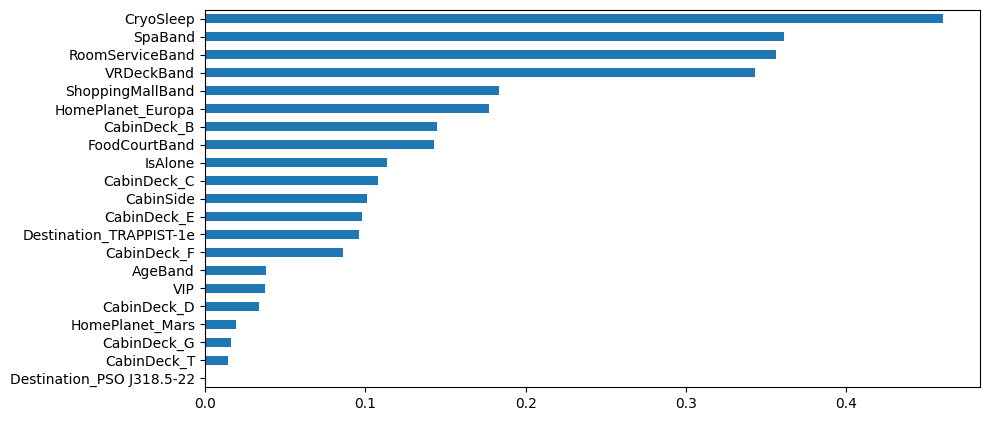

In [35]:
plt.figure(figsize=(10,5),dpi=100)
df_train_final.corr().Transported.abs().sort_values(ascending=True).iloc[:-1].plot.barh()

## Split data

In [36]:
X_train = df_train_final.drop(columns=['Transported'])
Y_train = df_train_final['Transported']
X_test = df_test_final

In [37]:
X = df_train_final.drop(columns=['Transported'])
y = df_train_final['Transported']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (6954, 21)
Y_train shape: (8693,)
X_test shape: (4277, 21)


## Training models

In [56]:
def get_metrics(y_train, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy_test = accuracy_score(y_train, y_pred)
    precision_test = precision_score(y_train, y_pred)
    recall_test = recall_score(y_train, y_pred)
    f1_test = f1_score(y_train, y_pred)

    print(f'Accuracy: {accuracy_test}')
    print(f'Precision: {precision_test}')
    print(f'Recall: {recall_test}')
    print(f'F1-Score: {f1_test}')

**LogisticRegression**

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
get_metrics(y_val, y_pred)

Accuracy: 0.7740080506037953
Precision: 0.7656078860898138
Recall: 0.7961275626423691
F1-Score: 0.7805695142378559


**Support vector machine**

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
get_metrics(y_val, y_pred)

Accuracy: 0.7901092581943646
Precision: 0.7761033369214209
Recall: 0.8211845102505695
F1-Score: 0.7980077476480354


**K nearest neighbor**

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
get_metrics(y_val, y_pred)

Accuracy: 0.7665324899367453
Precision: 0.7731481481481481
Recall: 0.7608200455580866
F1-Score: 0.7669345579793341


**Random Forest**

In [44]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
get_metrics(y_val, y_pred)

Accuracy: 0.7705577918343876
Precision: 0.7694038245219348
Recall: 0.7790432801822323
F1-Score: 0.7741935483870969


**Naive Bayes**

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val)
get_metrics(y_val, y_pred)

Accuracy: 0.7636572742955722
Precision: 0.7711962833914053
Recall: 0.7562642369020501
F1-Score: 0.7636572742955722


**Finall model to predict test data from Kaggle**

In [53]:
svm = SVC(kernel="rbf")

parameters = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001]}
CV_svm = GridSearchCV(svm, param_grid=parameters, cv=5,scoring="accuracy")
CV_svm.fit(pd.concat([X_train,X_val]), pd.concat([y_train,y_val]))

print("Best CV params", CV_svm.best_params_)
print("Best CV accuracy", CV_svm.best_score_)

Best CV params {'C': 100, 'gamma': 0.01}
Best CV accuracy 0.7930528966887707


In [54]:
submission['Transported'] = CV_svm.predict(X_test)

In [55]:
submission.to_csv('submission.csv', index = False)

Model accuracy on Kaggle's test dataset = 0.79284